In this homework, you need to solve four tasks. The assignment should be uploaded in Jupyter Notebook format(`.ipynb`). Overall, there are 23 points, however, you can get a maximum of 20 points for this assignment( `your_points = min(your_points, 20)`). No bonus points will be transferred to the next assignment.

# Task 1. Non-parametric Density Estimation (6 points)

In [1]:
import numpy as np
import numpy.linalg as nla
import scipy
import scipy.stats
import pandas as pd

from statsmodels.nonparametric.kernel_regression import KernelReg

In [2]:
# Matplotlib settings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# non-interactive
%matplotlib inline

#jupyterlab
# %matplotlib widget 

#jupyter-notebook
# %matplotlib notebook 

titlesize = 20
labelsize = 16
legendsize = labelsize
xticksize = 14
yticksize = xticksize

matplotlib.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
matplotlib.rcParams['legend.handletextpad'] = 0.5
matplotlib.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
matplotlib.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['mathtext.fontset']='cm'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['axes.labelsize'] = labelsize
matplotlib.rcParams['axes.titlesize'] = titlesize

matplotlib.rc('xtick', labelsize=xticksize)
matplotlib.rc('ytick', labelsize=yticksize)
matplotlib.rc('legend', fontsize=legendsize)

You will work with data sampled from the mixture of Normal distributions:

In [3]:
seed1 = 31337
seed2 = 42
n_samples = 100

f1 = scipy.stats.norm(loc=0, scale=1)
f2 = scipy.stats.norm(loc=5, scale=1)
p1 = 0.3
p2 = 1 - p1

Xa = f1.rvs(size=int(p1 * n_samples), random_state=seed1)
Xb = f2.rvs(size=int(p2 * n_samples), random_state=seed2)
samples = np.concatenate([Xa, Xb])

a = -5
b = 10

x_values = np.linspace(a, b, 1000)
binedges = np.linspace(a, b, 10)
true_pdf = p1 * f1.pdf(x_values) + p2 * f2.pdf(x_values)

## Histogram estimate

$\newcommand{\boldX}{\boldsymbol{X}}$
$\newcommand{\xs}[1]{\boldX^{(#1)}}$
$\newcommand{\Sum}{\sum\limits}$
$\newcommand{\Int}{\int\limits}$
$\newcommand{\hatp}{\widehat{p}}$
$\newcommand{\hatJ}{\widehat{J}}$
$\newcommand{\lp}{\left(}$
$\newcommand{\rp}{\right)}$

Given a sample $\boldsymbol{X}^{(n)} = \boldsymbol{X}_1, \boldsymbol{X}_2, ..., \boldsymbol{X}_n \sim \; iid \; p(x)$ we would like to build a histogram estimate of the density. If we have $m$ bins of size $h$, we can have the following estimates of risk using leave-one-out cross validation:

\begin{gather*}
J(h) = \int \hatp^2\lp x;\xs{n} \rp dx - 2 \int \hatp \lp x;\xs{n} \rp p(x) dx, 
\end{gather*}
\begin{gather*}
\hatJ(h) = \int \hatp^2 \lp x;\xs{n} \rp dx - \frac{2}{n}\Sum_{i = 1}^n \hatp \lp \boldsymbol{X}_i ;\xs{n\backslash i} \rp, \label{eq1}\tag{1}
\end{gather*}
\begin{gather*}
\hatJ(h) = \frac{2}{(n - 1)h} - \frac{n+1}{(n-1)h}\Sum_{i = 1}^m \hatp_j^2,\quad \hatp_j = \frac{n_j}{n}. \label{eq2}\tag{2}
\end{gather*}

Your task is:
1. Build a histogram estimate of the pdf given the sample above, tune bandwidth using leave-one-out CV based on $\hatJ$. Use formula (\ref{eq2}) (1 point)
2. \* Prove that for histograms (\ref{eq2}) follows from (\ref{eq1}) (1 bonus point)
3. Plot CV estimates $\hatJ(h)$ that you obtained during selection. Mark optimal bandwidth $h_{cv}$ and report $h_{cv}$ and $\hatJ(h_{cv})$ (0.5 point)
4. Recall the approximation to $MISE$ from Lecture 8, slide 11. Suppose that an Oracle calculated the integral of the squared derivative of the true density for you and the value is $0.0804924$. What will be the approximate optimal bandwidth $h^*$? Find CV estimate of $J$ for this value of bandwidth and compare it to the one found in part 1 (0.5 point)
5. `np.histogram` has some built-in methods of selecting bandwidth. Compare some of them with your CV result and theoretical approximation (again, using CV estimate of $J$) (1 point)

1.

In [4]:
def cross_validation_histogram(sample, h):
    n = len(sample)
    sample_min, sample_max = np.min(samples), np.max(samples)
    m = np.ceil((sample_max - sample_min) / h).astype('int')
    p = np.histogram(samples, bins=m, range=(sample_min, sample_max), density=False)[0] / n
    J = 2 / ((n - 1) * h) - (n + 1) / (h * (n - 1)) * np.sum(p ** 2)
    return J

In [5]:
h_list = np.logspace(-1, 1, 100)
cv_hist = [cross_validation_histogram(samples, hi) for hi in h_list]
h_cv = h_list[np.argmin(cv_hist)]

In [6]:
# from sklearn.neighbors import KernelDensity

# sample_min, sample_max = np.min(samples), np.max(samples)
# bins = (np.ceil((sample_max - sample_min) / h_cv)).astype('int')

# density = KernelDensity(kernel='gauss', bandwidth=h_cv).fit(samples[:, None])
# density_values = np.exp(density.score_samples(x_values[:, None]))

# fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# ax.hist(samples, bins=bins, density=True)
# ax.plot(x_values, density_values)
# ax.grid()
# plt.show()

3.

In [7]:
J_min = np.min(cv_hist)
print(f'h_cv={h_cv:.3f}')
print(f'J_min={J_min:.3f}')

h_cv=0.850
J_min=-0.161


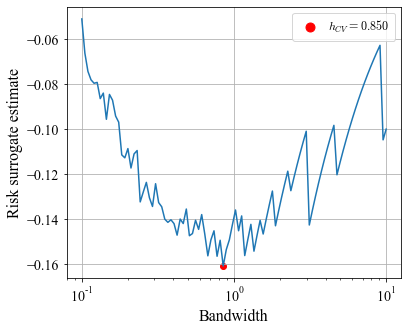

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(h_list, cv_hist)
ax.scatter(h_cv, J_min, c='#ff0000', label=f'$h_{{CV}} = {h_cv:.3f}$')
ax.set_xscale("log")
ax.set_xlabel("Bandwidth")
ax.set_ylabel("Risk surrogate estimate")
ax.legend(fontsize='medium')
ax.grid()
plt.show()

4.

MISE approximation from the lecture (lecture 8, page 11) is the following
$$
    MISE(\hat{p}_n, p) \approx \frac{h^2}{12} \int \left( p^\prime(x)\right)^2 dx + \frac{1}{nh}
$$

In [9]:
n = samples.size
def mise_approx(h):
    return h**2 / 12 * 0.0804924 + 1 / (n * h)

cv_approx = [mise_approx(hi) for hi in h_list]
h_approx = h_list[np.argmin(cv_approx)]
print(f'h_approx={h_approx:.3f}')

h_approx=0.890


5.

Numpy bin width selection comes since version 1.11.0. `'stone'` estimator is based on leave-one-out CV estimate of the integrated squared error, therefore it should provide answer close to obtained above 

In [10]:
print(np.__version__)

edges = np.histogram(samples, bins='stone')[1]
h_np = edges[1] - edges[0]
print(f'{h_np:.3f}')

1.20.1
0.844


Appoximate value is close to obtained above

## Kernel density estimate

In this part, you will use the same sample, but employ the kernel density estimation method. We can use the same proxy expression to optimise the risk:
\begin{gather*}
J(h) = \int \hatp^2 \lp x;\xs{n} \rp dx - 2 \int \hatp \lp x;\xs{n} \rp p(x) dx
\end{gather*}

In out case of kernel estimator, we can obtain:
\begin{gather*}
\hatJ(h) = \frac{1}{hn^2}\Sum_{i = 1}^n\Sum_{j = 1}^n K^{(2)}\lp\frac{x_i - x_j}{h}\rp + \frac{2K(0)}{nh}, \label{eq3}\tag{3}
\end{gather*}
where
\begin{gather*}
K^{(2)}(x) = K^*(x) - 2K(x), \quad K^*(x) = \int K(x - y) K(y) dy.
\end{gather*}

You can use [kernel density estimation from sklearn](http://scikit-learn.org/stable/modules/density.html). Your task is:
1. Build a kernel density estimate given the sample from before, tune bandwidth using leave-one-out CV. Try two different kernels of your choice. Use formula \ref{eq3} in your tuning procedure (1 point)
2. Plot CV estimates $\hatJ(h)$ that you obtained during selection. Mark optimal bandwidth $h_{cv}$ and report $h_{cv}$ and $\hatJ(h_{cv})$. What kernel worked better in terms of estimated surrogate risk? (0.5 point)
3. Recall the approximation to $MISE$ from Lecture 8, slide 20. Suppose that an Oracle calculated the integral of the squared second derivative of the true density for you and the value is $0.127529$. What will be the approximate optimal bandwidth $h^*$? Find CV estimate of $J$ for this value of bandwidth and compare it to the one found in part 1 (0.5 point)

1.

For Gaussian kernel 
$$
    K(x) = f_{\mathcal{N}(0, 1)}(x) \\ 
    K^\ast(x) = f_{\mathcal{N}_{0, 2}}(x),
$$
<!-- $K^{(2)}(x) = \frac{1}{2\sqrt{\pi}}\exp\left(-\frac{x^2}{4}\right) - \sqrt{\frac{2}{\pi}}\exp\left(-\frac{x^2}{2}\right)$ -->

For Epanechnikov kernel
$$
    K(x) = \frac{3}{4}(1 - x^2) \\
    K^\ast(x) = K(x)\left[1 - \frac{3}{2}x^2\right]
$$

In [11]:
def gauss_kernel(x):
    K = 1 / np.sqrt(2 * np.pi) * np.exp(-x ** 2 / 2)
    return K

def gauss_kernel2(x):
    K2 = 1 / (2 * np.sqrt(np.pi)) * np.exp(-x ** 2 / 4) - 2 * gauss_kernel(x)
    return K2

def epan_kernel(x):
    K = 3 / 4 * (1 - x**2)
    return K

def epan_kernel2(x):
    K2 = epan_kernel(x) * (1 - 3 * x**2 / 2) - 2 * epan_kernel(x)
    return K2

In [12]:
def cross_validation_kernel(sample, h, kernel, kernel2):
    n = len(sample)
    J = np.sum(kernel2((sample[:,None] - sample) / h)) / (h * n**2) + 2 * kernel(0) / (n * h)
    return J

In [13]:
cv_hist_gauss = [cross_validation_kernel(samples, hi, gauss_kernel, gauss_kernel2) for hi in h_list]
cv_hist_epan = [cross_validation_kernel(samples, hi, epan_kernel, epan_kernel2) for hi in h_list]

h_gauss = h_list[np.argmin(cv_hist_gauss)]
h_epan = h_list[np.argmin(cv_hist_epan)]

J_min_gauss = np.min(cv_hist_gauss)
J_min_epan = np.min(cv_hist_epan)

2.

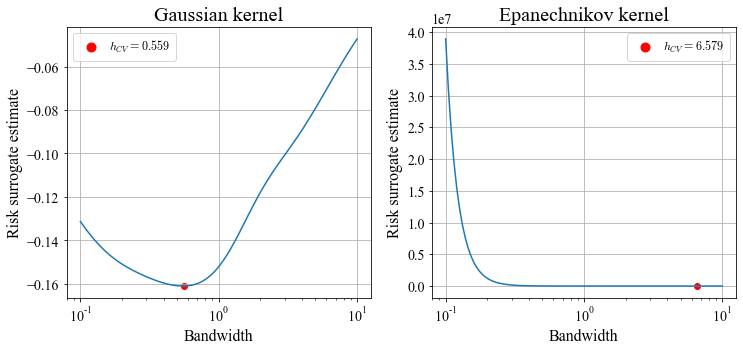

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(h_list, cv_hist_gauss)
ax[0].scatter(h_gauss, J_min_gauss, c='#ff0000', label=f'$h_{{CV}} = {h_gauss:.3f}$')
ax[0].set_xscale("log")
ax[0].set_xlabel("Bandwidth")
ax[0].set_ylabel("Risk surrogate estimate")
ax[0].grid()
ax[0].set_title('Gaussian kernel')
ax[0].legend(fontsize='medium')

ax[1].plot(h_list, cv_hist_epan)
ax[1].scatter(h_epan, J_min_epan, c='#ff0000', label=f'$h_{{CV}} = {h_epan:.3f}$')
ax[1].set_xscale("log")
ax[1].set_xlabel("Bandwidth")
ax[1].set_ylabel("Risk surrogate estimate")
ax[1].grid()
ax[1].set_title('Epanechnikov kernel')
ax[1].legend(fontsize='medium')
plt.show()

3.

MISE approximation from the lecture is the following
$$
    MISE(\hat{p}_n, p) \approx \frac{1}{4}\sigma^4_K h^4 \int\left[p^{\prime\prime}(x)\right]^2 dx + \frac{1}{nh} \int \left[K(x)\right]^2 dx
$$

For Gaussian kernel $K(x)$
$$
    \sigma_K^2 = 1 \\
    \int \left[K(x)\right]^2 dx = \frac{1}{2\sqrt{\pi}}.
$$

In [15]:
def mise_approx(sample, h):
    n = len(sample)
    return 0.25 * h**4 * 0.127529 + 1 / (n * h) * 1 / (2 * np.pi)

In [16]:
cv_hist_approx = [mise_approx(samples, hi) for hi in h_list]
h_gauss_approx = h_list[np.argmin(cv_hist_approx)]
print(f'{h_gauss_approx:.3f}')

0.423


Appoximate value is close to obtained above, but worse than in histogram case

# Task 2. Non-parametric Regression (5.5 pt)

In this task you will apply non-parametric regression to airport statistics data.

### Data loading and preprocessing

Load dataset from `airport_operations_report.csv`. Use `General Aviation: Total Operations` as target (dependent) variable and `[Air Carrier Operations, General Aviation: Local Operations]` as covariates(independent variables). Divide $1^{st}$ covariate by `1000`, $2^{nd}$ by `100` and target by `1000`. Make a 2D grid for covariates from minimum to maximum values with `100` steps along each dimension.

In [17]:
# Your code

df = pd.read_csv('airport_operations_report.csv')
data = np.array(df.iloc[:,:-1])
target = np.array(df.iloc[:,-1])
data = data / np.array([1000, 100])
cov1 = data[:,0]
cov2 = data[:,1]
target = target / 1000

In [18]:
xs = np.linspace(cov1.min(), cov1.max(), 100)
ys = np.linspace(cov2.min(), cov2.max(), 100)
xx, yy = np.meshgrid(xs, ys)
grid = np.stack([xx, yy], axis=-1).reshape(10000, 2)

### Fit model (1 pt)

Perform a nonparametric regression to fit the model $Y = f(x)+\varepsilon$.

In [19]:
from sklearn.kernel_ridge import KernelRidge

nw = KernelReg(target, data, var_type='cc')

Predict values for the created grid.

In [20]:
# step_numbers - number of steps in grid: (100, 100)
step_numbers = (100, 100)

# Your code

target_pred, margins = nw.fit(grid)
target_pred = target_pred.reshape(*step_numbers)
grid = grid.reshape(*step_numbers, 2)

This is function to visualize 3D surfaces. You can modify it if you need.

In [21]:
def plot_surface_function(x1, x2, y, minmax_values=None, ax=None):
    
    if ax is None:
        fig = plt.figure(1, figsize=(20, 12))
        ax = fig.gca(projection='3d')

        surf = ax.plot_surface(x1, x2, y, cmap=cm.rainbow, linewidth=0.5, alpha=0.5, edgecolor="k")
        if minmax_values is not None:
            ax.set_xlim3d(*minmax_values[0])
            ax.set_ylim3d(*minmax_values[1])
    
    else:
        surf = ax.plot_surface(x1, x2, y, cmap=cm.bwr, linewidth=0.5, alpha=0.1, edgecolor="k")
        
    return ax

Let's plot the estimated surface.

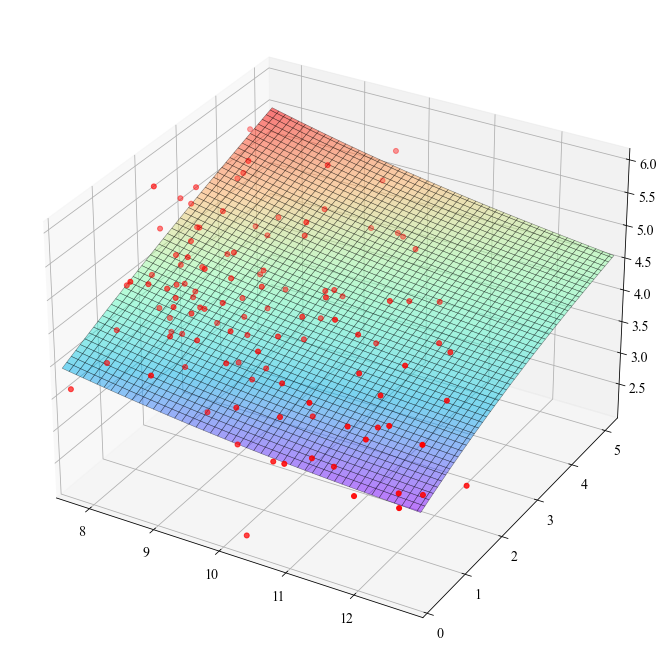

In [22]:
# target - dependent variable
# grid - grid for covariates
# sample - covariates

sample_min = data.min(axis=0)
sample_max = data.max(axis=0)

ax = plot_surface_function(grid[:, :, 0], grid[:, :, 1], target_pred, minmax_values=np.vstack((sample_min, sample_max)).T)
ax.scatter(data[:, 0], data[:, 1], target, marker="o", s=25, c="r")
plt.show()

### Estimate confidence intervals (2 pt)

Construct 95\% confidence bands for your estimate. To estimate error variance for 1D covariate, you sort your sample and subtract target values of the nearest points. For 2D covariate, you should, for each point, calculate the difference in target values between a point and its nearest neighbor (in euclidian metric). 

To get power for quantile of the standard normal distribution, which is $\frac{h}{b-a}$ for 1D, estimate it per coordinate and multiply: $\prod_{i=1}^2 \frac{h_i}{b_i-a_i}$. 

For gauss kernel $h = 3 \times$ kernel_bandwidth.

I didn't get how to compute kernel weights for 2d case, as `rbf_kernel` takes scalar `h`, but here we have 2d bandwidth for each dimension. I decided to feed $\max(h_1, h_2)$ to `rbf_kernel`

In [23]:
print(nw.bw)

[2.32985883 2.25977935]


In [24]:
import scipy.stats as sst
from sklearn.metrics.pairwise import rbf_kernel
kernel = lambda x, y, h: rbf_kernel(x, y, 0.5 / h**2) / (2 * np.pi)**(x.shape[1] / 2)

def prediction_se(grid, sample, target, h, alpha=0.05):
    n = target.shape[0]
    grid = grid.reshape(-1, 2)
    sum_sigma = 0
    for i in range(n):
        x = data[i]
        idx_nearest = np.where(np.linalg.norm(data - x, axis=1).argsort() == 1)[0].item()
        # argsort == 1 because argsort == 0 will yield i itself
        sum_sigma += (target[i] - target[idx_nearest]) ** 2
    sigma_hat2 = sum_sigma / (2 * (n-1))
    delta = np.max(data, axis=0) - np.min(data, axis=0)

    kernel_values = kernel(grid, sample, h.max())
    kernel_sum = np.sum(kernel_values, axis=1, keepdims=True)

    nonzero_indices = kernel_sum[:, 0] > 1e-8
    kernel_weights = kernel_values
    kernel_weights[nonzero_indices] = kernel_weights[nonzero_indices] / kernel_sum[nonzero_indices]
    kernel_weights[~nonzero_indices] = 0

    se = np.sqrt(np.sum(kernel_weights**2, axis=1) * sigma_hat2)
    m = np.prod(delta / (3 * h))
    # will yield coordinatewise product of h / (b - a)
    q = sst.norm.ppf((1+(1-alpha)**(1/m))/2)
    return q*se

In [25]:
# Your code here

qse = prediction_se(grid, data, target, nw.bw)
qse = qse.reshape(*step_numbers)

Let's plot confidence intervals

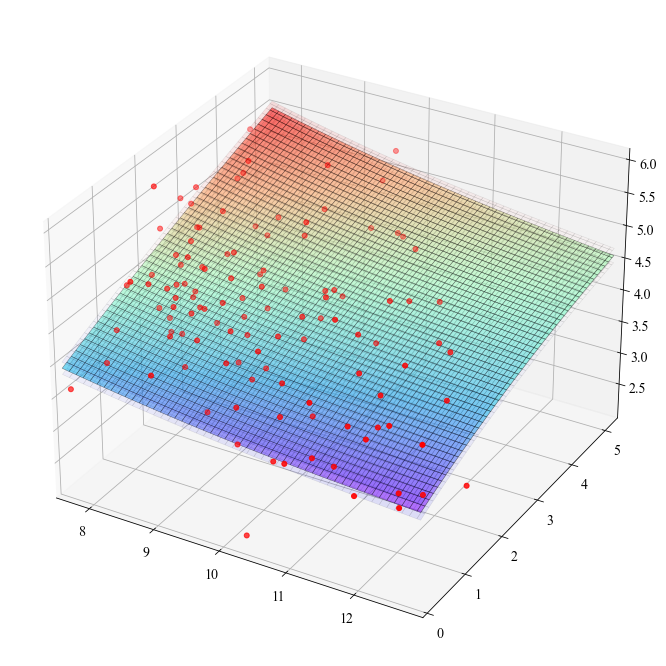

In [26]:
grid = grid.reshape(100, 100, 2)
ax = plot_surface_function(grid[:, :, 0], grid[:, :, 1], target_pred, minmax_values=np.vstack((sample_min, sample_max)).T)
ax.scatter(data[:, 0], data[:, 1], target, marker="o", s=25, c="r")
ax = plot_surface_function(grid[:, :, 0], grid[:, :, 1], target_pred + qse, ax=ax)
ax = plot_surface_function(grid[:, :, 0], grid[:, :, 1], target_pred - qse, ax=ax)
plt.show()

### Find optimal bandwidth (2 pt)

Use cross-validation to estimate the bandwidth.

In [27]:
def cross_validation_regression(sample, target, h):
    n = sample.shape[0]
    mask = np.ones(n, dtype=np.bool_)
    bw = np.r_[h]
    summ = 0
    for i in range(n):
        mask[i] = False
        nw = KernelReg(target[mask], sample[mask], var_type="cc", reg_type="lc", bw=bw)
        mask[i] = True
        summ += (target[i] - nw.fit(sample[i])[0])**2
    return summ.item()

Make a grid with logarithmic scale to find best bandwidth, from `0.1` to `10` with `21` steps along each dimension. Visualize the obtained results with `plot_surface_function`. Print values of optimal bandwidth.

In [28]:
hx, hy = np.meshgrid(np.logspace(-1, 0, 21), np.logspace(-1, 0, 21))
h_list = np.stack([hx, hy], axis=-1)
cv_regr = np.zeros((21, 21))
for i in range(21):
    for j in range(21):
        cv_regr[i, j] = cross_validation_regression(data, target, h_list[i, j])

Plot surface with estimated bandwidth.

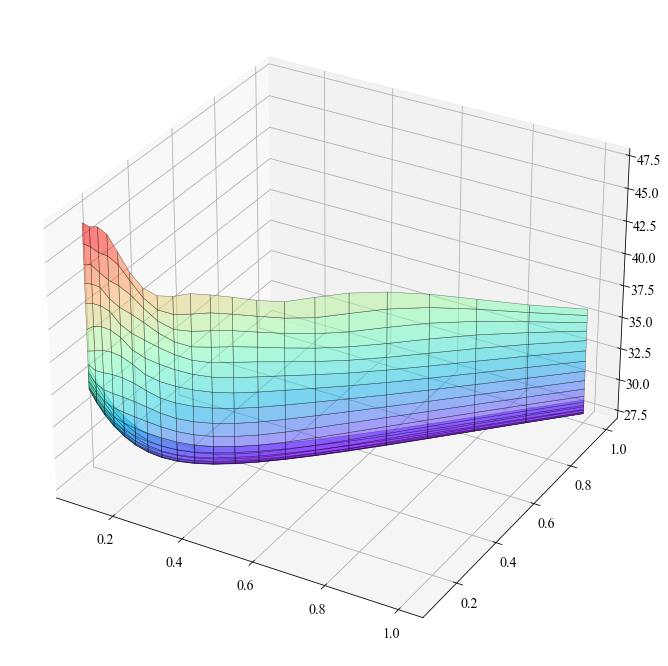

In [29]:
# Your code here
plot_surface_function(h_list[:, :, 0], h_list[:, :, 0], cv_regr)
plt.show()

### Conclusion (0.5 pt)

Write your conclusions about conducted experiments (2-5 sentence).

    Nonparametric regression for 2d data can be derived from 1d case and employs analogous approaches. At the same time, nearest neighbor search in confidence interval estimation requires is either more computationaly costly or requires specific data structures (kd-tree etc.)

# Task 3. Model Selection (5.5 pt)

In this task you will select a model (choose a set of covariates) using AIC criteria and forward/backward stepwise regression.

### Data loading and preprocessing

Read dataset `pacn_wrcc.csv`. The target variable is `ly Solar Rad.`, others are covariates.

In [30]:
df = pd.read_csv('pacn_wrcc.csv')
data = df.drop('ly Solar Rad.', axis=1)
target = df['ly Solar Rad.']
names = data.columns.tolist()
X = np.array(data)
y = np.array(target)

Scale covariates to range `[0, 1]` and add bias column.

In [31]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
X = np.hstack([X, np.ones((X.shape[0], 1))])

### $C_p$ Mallow and sample variance (2 pt) 

Estimate sample variance of error with full set of covariates. Take into account number of dependent variables.

In [32]:
# from statsmodels.regression.linear_model import OLS

# model = OLS(target, data)
# results = model.fit()

# # results.summary()

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)
sigma2 = np.var(pred - y)
print(f'{sigma2:.3f}')

27.210


Implement estimation of $C_p$ Mallow for given covariates, target and error variance.

$C_p$:
$$
    \hat{R}(S) = \hat{R}_{tr}(S) + 2 |S|\hat{\sigma}^2
$$

In [34]:
def Cp(X, y, sigma2):
    s = X.shape[1]
    model = LinearRegression()
    model.fit(X, y)
    y_hat = model.predict(X)
    r_tr = np.sum((y_hat - y)**2)
    return r_tr + 2 * s * sigma2

### Forward stepwise regression (1 pt)

Implement forward stepwise regression. Save the order in which covariates are added to feature set and $C_p$ values for those feature sets.

In [35]:
from sklearn.metrics import mean_squared_error

def forward_stepwise_regression(X, y, sigma2, alpha=0.):
    n_features = X.shape[1]
    mask = np.ones(n_features, dtype=np.bool_)
    model = LinearRegression()
    cp_list = []
    
    scores_init = []
    for i in range(n_features):
        model.fit(X[:,i].reshape(-1, 1), y)
        scores_init.append(model.score(X[:,i].reshape(-1, 1), y))
    idx = np.argmax(scores_init)
    mask[idx] = False
    features = X[:,idx].reshape(-1, 1)
    feature_ids = [idx]
    cp_list.append(Cp(features, y, sigma2))
    prev_score = np.max(scores_init)
    
    while np.sum(~mask) < n_features:
        scores = np.zeros(n_features)
        scores[~mask] = -np.inf
        for i in range(n_features):
            if mask[i]:
                X_temp = np.hstack([features, X[:,i].reshape(-1, 1)])
                model.fit(X_temp, y)
                scores[i] = model.score(X_temp, y)
        best_score = np.max(scores)
        idx = np.argmax(scores)
        mask[idx] = False
        if best_score < prev_score:
            break
        else:
            features = np.hstack([features, X[:,idx].reshape(-1, 1)])
            cp_list.append(Cp(features, y, sigma2))
            feature_ids.append(idx)
    return feature_ids, cp_list

In [36]:
features, cp_list = forward_stepwise_regression(X, y, sigma2)
for a, cp_value in enumerate(cp_list):
    try:
        print(f"C_p {cp_value:.3f} +{names[features[a]]}")
    except IndexError:
        print(f"C_p {cp_value:.3f} +bias")

C_p 19037.700 +Deg F Mx Air Temp
C_p 16518.629 +Deg F 4" Soil Ave Tmp
C_p 14486.790 +volts Battery Voltage
C_p 11981.102 +% Rel Humidty
C_p 10138.750 +mph Mx Gust Speed
C_p 9616.813 +Deg F Av Air Temp
C_p 8997.261 +Deg F Mn Air Temp
C_p 8942.342 +Deg Wind Direc
C_p 8954.716 +Deg F 2" Soil Ave Tmp
C_p 8733.550 +Deg F 20"Soil Av Temp
C_p 8769.516 +Deg Dir MxGust
C_p 8816.962 +Deg F 8" Soil Av Temp
C_p 8870.373 +mph Wind Speed
C_p 8924.793 +bias


### Backward stepwise regression (1 pt)

Implement backward stepwise regression. Save the order in which covariates are removed from feature set and $C_p$ values for those feature sets.

In [37]:
def backward_stepwise_regression(X, y, sigma2, alpha=0.):
    n_features = X.shape[1]
    mask = np.ones(n_features, dtype=np.bool_)
    model = LinearRegression()
    cp_list = []
    feature_ids = []
    prev_score = -1
        
    while np.sum(mask) > 1:
        scores = np.zeros(n_features)
        scores[~mask] = -np.inf
        mask_temp = mask.copy() 
        for i in range(n_features):
            if mask[i]:
                mask_temp[i] = False
                X_temp = X[:,mask_temp]
                model.fit(X_temp, y)
                scores[i] = model.score(X_temp, y)
                mask_temp[i] = True
        idx = np.argmax(scores)
        best_score = np.max(scores)
        mask[idx] = False
        if best_score < prev_score:
            break
        else:
            feature_ids.append(idx)
            cp_list.append(Cp(X[:,mask], y, sigma2))
    return feature_ids, cp_list

In [38]:
features, cp_list = backward_stepwise_regression(X, y, sigma2)
for a, cp_value in enumerate(cp_list, 1):
    try:
        print(f"C_p {cp_value:.3f} -{names[features[a]]}")
    except IndexError:
        print(f"C_p {cp_value:.3f} -bias")

C_p 8870.373 -mph Wind Speed
C_p 8816.962 -Deg F 8" Soil Av Temp
C_p 8769.516 -Deg Dir MxGust
C_p 8733.550 -Deg Wind Direc
C_p 8798.427 -Deg F 20"Soil Av Temp
C_p 9008.478 -Deg F 2" Soil Ave Tmp
C_p 8997.261 -Deg F Mx Air Temp
C_p 9210.702 -Deg F Mn Air Temp
C_p 9563.629 -mph Mx Gust Speed
C_p 11171.672 -Deg F 4" Soil Ave Tmp
C_p 13573.520 -volts Battery Voltage
C_p 18027.550 -% Rel Humidty
C_p 21632.060 -bias


### Bruteforce (1 pt)

Find best sets of covariates and their $C_p$ for all sizes of feature sets.

Here we consider $2^n - 1$ subsets of initial features (excluding empty set)

In [39]:
from tqdm import tqdm
def bruteforce(X, y, sigma2, alpha=0.):
    n_features = X.shape[1]
    cp_list = []
    for i in tqdm(range(1, 2 ** n_features)):
        bin_i = bin(i)[2:]
        bin_full = list(map(int, (14 - len(bin_i)) * '0' + bin_i))
        mask = np.array(bin_full, dtype='bool')
        X_temp = X[:,mask]
        cp_list.append(Cp(X_temp, y, sigma2))
    return np.vstack([np.arange(1, 2 ** n_features), cp_list])

In [40]:
res = bruteforce(X, y, sigma2)
top10 = res[:,res[1].argsort()][:,:10].T
names_np = np.array(names + ['bias'])
for idx, cp_value in top10:
    idx = int(idx)
    bin_i = bin(idx)[2:]
    bin_full = list(map(int, (14 - len(bin_i)) * '0' + bin_i))
    mask = np.array(bin_full, dtype='bool')
    print(f"C_p {cp_value:.3f} :{names_np[mask]}")

100%|██████████| 16383/16383 [00:06<00:00, 2501.21it/s]

C_p 8733.550 :['Deg Wind Direc' 'Deg F Av Air Temp' '% Rel Humidty'
 'volts Battery Voltage' 'mph Mx Gust Speed' 'Deg F Mn Air Temp'
 'Deg F Mx Air Temp' 'Deg F 2" Soil Ave Tmp' 'Deg F 4" Soil Ave Tmp'
 'Deg F 20"Soil Av Temp']
C_p 8769.516 :['Deg Wind Direc' 'Deg F Av Air Temp' '% Rel Humidty'
 'volts Battery Voltage' 'Deg Dir MxGust' 'mph Mx Gust Speed'
 'Deg F Mn Air Temp' 'Deg F Mx Air Temp' 'Deg F 2" Soil Ave Tmp'
 'Deg F 4" Soil Ave Tmp' 'Deg F 20"Soil Av Temp']
C_p 8782.748 :['Deg Wind Direc' 'Deg F Av Air Temp' '% Rel Humidty'
 'volts Battery Voltage' 'mph Mx Gust Speed' 'Deg F Mn Air Temp'
 'Deg F Mx Air Temp' 'Deg F 2" Soil Ave Tmp' 'Deg F 4" Soil Ave Tmp'
 'Deg F 8" Soil Av Temp' 'Deg F 20"Soil Av Temp']
C_p 8787.675 :['mph Wind Speed' 'Deg Wind Direc' 'Deg F Av Air Temp' '% Rel Humidty'
 'volts Battery Voltage' 'mph Mx Gust Speed' 'Deg F Mn Air Temp'
 'Deg F Mx Air Temp' 'Deg F 2" Soil Ave Tmp' 'Deg F 4" Soil Ave Tmp'
 'Deg F 20"Soil Av Temp']
C_p 8787.969 :['Deg Wind Direc

### Conclusion (0.5 pt)

Write your conclusions about conducted experiments (2-5 sentence).

    Backward and forward procedures show similar picture of feature importances. Brute force helps to find better Cps, but is too costly.

# Task 4. Local regression (6 points)

In [41]:
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.linear_model import LogisticRegression

In [42]:
X = np.array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18181818,
        1.24242424,  1.3030303 ,  1.36363636,  1.42424242,  1.48484848,
        1.54545455,  1.60606061,  1.66666667,  1.72727273,  1.78787879,
        1.84848485,  1.90909091,  1.96969697,  2.03030303,  2.09090909,
        2.15151515,  2.21212121,  2.27272727,  2.33333333,  2.39393939,
        2.45454545,  2.51515152,  2.57575758,  2.63636364,  2.6969697 ,
        2.75757576,  2.81818182,  2.87878788,  2.93939394,  3.        ])

In [43]:
Y = np.array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

You are given a sample of pairs $(X_i, Y_i)$. The output variable appers to be binary. We know a model for this type of data: logistic regression. In this model we assume the log-odds of the Bernoulli output variable to be a linear function:
$$\mathbb{P}(Y_i = 1 | X_i = x_i) = p(x_i) = \frac{e^{\beta_0 + \beta_1 x_i}}{1 + e^{\beta_0 + \beta_1 x_i}}$$
Lets fit a standard logistic regression to the data:

In [44]:
logreg = LogisticRegression(penalty='none')
logreg.fit(X.reshape(-1, 1), Y)
p_pred_global = logreg.predict_proba(X.reshape(-1, 1))[:, 1]
print(f"Coefficients of the fitted logistic regression model: b0={logreg.intercept_[0]}, b1={logreg.coef_[0][0]}")

Coefficients of the fitted logistic regression model: b0=0.37698394684326253, b1=0.9109286874943999


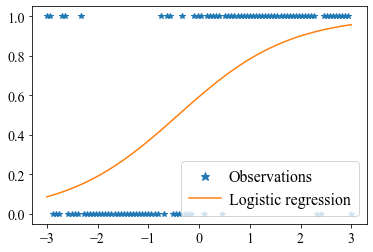

In [45]:
plt.plot(X, Y, '*', label='Observations')
plt.plot(X, p_pred_global, label='Logistic regression')
plt.legend()

## Local regression

As we can see, the dependence of the outcome on $x$ looks more complex than estimated using logistic regression. We will try to improve it with local regression methods.
Instead of a global model, we will approximate conditinal probability of the positive class in a neighbourhood of $x$ with:
$$p(u) \approx \frac{e^{\beta_0 + \beta_1 (u-x) }}{1 + e^{\beta_0 + \beta_1 (u-x)}}, $$
for $u$ close to $x$. The coefficients in this case will depend on $x$. To find them, we will have to fit a (slightly different) model **at each new query point** $x_{new}$ (point where we want to predict $Y$). We will also need to introduce a notion of 'closeness' of points across $x$ - for this we can use our familiar *kernel functions*. Bringing everything together, we introduce the following **local** loglikelihood for our proposed model:
$$\ell_x(\beta) = \sum\limits_{i=1}^{n} K\left(\frac{x-X_i}{h}\right)\ell\left(Y_i, \beta_0 + \beta_1 \left(X_i - x\right)\right) = \sum\limits_{i=1}^{n} K\left(\frac{x-X_i}{h}\right) \left(Y_i \left(\beta_0 + \beta_1 \left(X_i - x\right)\right) - \log \left( 1 + e^{\beta_0 + \beta_1 \left(X_i - x\right)} \right) \right),$$
$$\ell(y, z) = yz - \log \left(1 + e^z \right).$$
Here $\ell(y, z)$ is a log-likelohood for a single Bernoulli with log-dds ratio $z = \log\frac{p}{1-p}$. The local log-likelihood $\ell_x(\beta)$ should be optimized numerically for each new point $x$ to obtain $\widehat{\beta}(x)=(\widehat{\beta_0}(x), \widehat{\beta_1}(x))$. Then, we can predict $Y$ using the logistic model:
$$ \mathbb{P}(Y=1 | X=x) = \frac{e^{\beta_0(x)}}{1 + e^{\beta_0(x)}}.$$
Your task is:
1. Implement the proposed local logistic regression approach using gauss kernel. *Hint*: look at additional parameters of the `fit` method of [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from `sklearn` package (2 points)
2. Select optimal bandwidth using leave-one-out log-likelihood cross-validation with log-likelihood as metric: $\ell_{cv} = \sum_i \ell(Y_i, \widehat{z}_{-i}(x_i))$, where $\widehat{z}_{-i}$ is the estimated log-odds ratio without $i$th sample (3 points)
3. Now ignore that the output variable is binary. Compare previous results with local linear kernel regression method using `KernelReg` from `statsmodels`. Use leave-one out squared error cross-validation to select the bandwidth (1 bonus point)

In [46]:
LogisticRegression().fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# Your code for Local Linear regression